In [6]:
import pandas as pd 
import pandas_ta as ta
df = pd.read_pickle('/root/trading_systems/kucoin_btc_usdt_1hour.pkl')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52122 entries, 0 to 52121
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   time      52122 non-null  datetime64[ns, UTC]
 1   open      52122 non-null  float64            
 2   close     52122 non-null  float64            
 3   high      52122 non-null  float64            
 4   low       52122 non-null  float64            
 5   volume    52122 non-null  float64            
 6   turnover  52122 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 2.8 MB


In [13]:
import datetime 
# Calculate RSI with a period of 14
df['RSI'] = ta.rsi(df['close'], length=14)

# Calculate 6 different EMAs
ema_periods = [50, 100, 150, 500, 750, 1000]
for period in ema_periods:
    df[f'EMA_{period}'] = ta.ema(df['close'], length=period)

# get partial df by date and time range
df_part = df[(df['time'] > '2021-01-01') & (df['time'] < '2021-02-01')]
df_part.head()
df_part.to_pickle('/root/trading_systems/kucoin_btc_usdt_1hour_TA.pkl')
df_part


,time,open,close,high,low,volume,turnover,RSI,EMA_50,EMA_100,EMA_150,EMA_500,EMA_750,EMA_1000,Close
17545,2021-01-01 01:00:00+00:00,28990.9,29407.0,29469.5,28958.5,169.749854,4.970102e+06,62.037282,28467.059981,27770.243005,27134.289320,24034.608342,22634.323708,21530.647880,29407.0
17546,2021-01-01 02:00:00+00:00,29408.9,29191.3,29462.0,29125.2,71.221771,2.084996e+06,57.196060,28495.461550,27798.382748,27161.534495,24055.193937,22651.785696,21545.953878,29191.3
17547,2021-01-01 03:00:00+00:00,29192.9,29279.5,29346.4,29152.0,39.830602,1.165219e+06,58.618113,28526.208156,27827.711802,27189.587018,24076.049450,22669.436067,21561.405519,29279.5
17548,2021-01-01 04:00:00+00:00,29279.6,29222.7,29380.4,29058.2,65.881338,1.926278e+06,57.297927,28553.521562,27855.335331,27216.515667,24096.594961,22686.888168,21576.712800,29222.7
17549,2021-01-01 05:00:00+00:00,29222.6,29181.1,29237.5,29100.4,42.041661,1.225996e+06,56.297869,28578.132481,27881.588096,27242.536651,24116.892387,22704.183006,21591.906381,29181.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,2021-01-31 19:00:00+00:00,32449.5,32817.0,32927.1,32414.1,104.001671,3.402629e+06,40.202536,33669.966941,33498.863749,33371.798076,33390.941215,32535.373336,31354.106491,32817.0
18284,2021-01-31 20:00:00+00:00,32810.8,32855.4,32918.3,32496.5,83.223950,2.725662e+06,40.854531,33638.023139,33486.121892,33364.958366,33388.803326,32536.225605,31357.106078,32855.4
18285,2021-01-31 21:00:00+00:00,32855.4,32562.2,32897.2,32521.7,78.954789,2.583405e+06,37.493055,33595.833997,33467.826409,33354.325805,33385.503512,32536.294777,31359.513858,32562.2
18286,2021-01-31 22:00:00+00:00,32567.5,32977.7,33082.8,32567.4,51.060017,1.679138e+06,44.466346,33571.593448,33458.120936,33349.337384,33383.875554,32537.470291,31362.746998,32977.7


<Axes: xlabel='time'>

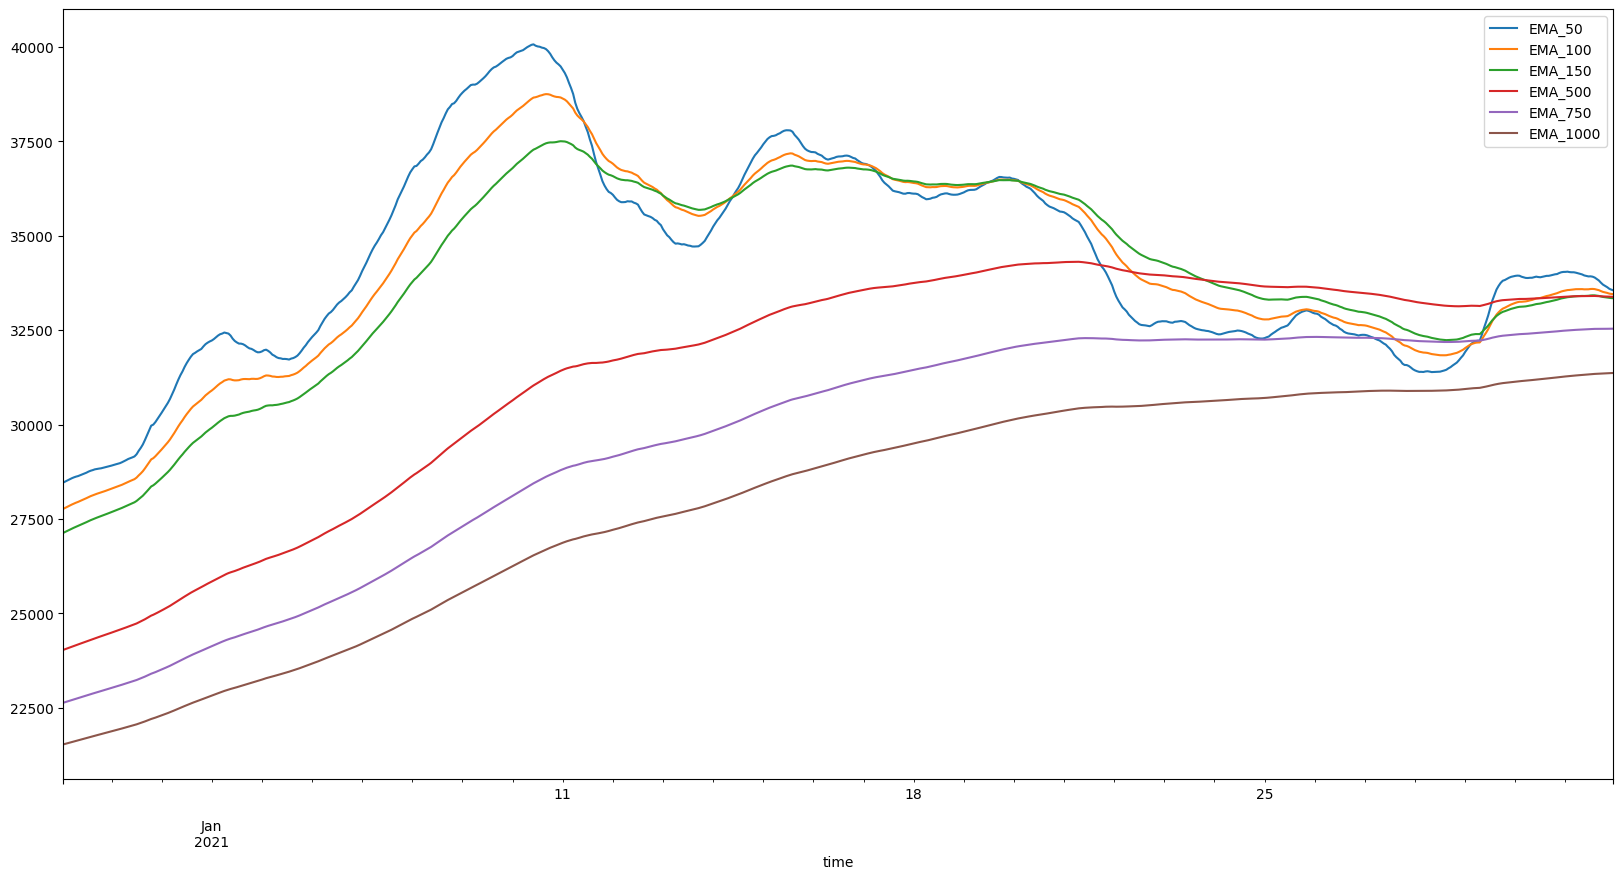

In [8]:
# df.plot(y=[ 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'EMA_300'],x='time', figsize=(20, 10))
df_part.plot(y=[ 'EMA_50', 'EMA_100', 'EMA_150', 'EMA_500', 'EMA_750', 'EMA_1000'],x='time', figsize=(20, 10))

In [9]:
# Calculate SuperTrend with default parameters (length=10, multiplier=3)
supertrend= ta.supertrend(df['high'], df['low'], df['close'])
supertrend

,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
0,0.000000,1,NaN,NaN
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN
4,NaN,1,NaN,NaN
...,...,...,...,...
52117,98904.317840,-1,NaN,98904.31784
52118,96782.966863,1,96782.966863,NaN
52119,97641.050168,1,97641.050168,NaN
52120,98231.528715,1,98231.528715,NaN


In [14]:
df.rename(columns={
    'time': 'Time',
    'open': 'Open',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'volume': 'Volume'})
df.to_pickle('/root/trading_systems/kucoin_btc_usdt_1hour_TA.pkl')